In [1]:
from dfply import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

# Load files

In [2]:
# read file from data
filename1 = 'Assignment 2 - new.app4.csv'
filename2 = 'Assignment 2 - USA_AL_Auburn-Opelika.AP.722284_TMY3_BASE.csv'
df1 = pd.read_csv('data/' + filename1, parse_dates=['time'], index_col='time')
df2 = pd.read_csv('data/' + filename2, parse_dates=['Date/Time'], index_col=False)

df2.head()

,Date/Time,Electricity:Facility [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Electricity [kW](Hourly),Heating:Gas [kW](Hourly),Cooling:Electricity [kW](Hourly),HVACFan:Fans:Electricity [kW](Hourly),Electricity:HVAC [kW](Hourly),Fans:Electricity [kW](Hourly),General:InteriorLights:Electricity [kW](Hourly),General:ExteriorLights:Electricity [kW](Hourly),Appl:InteriorEquipment:Electricity [kW](Hourly),Misc:InteriorEquipment:Electricity [kW](Hourly),Water Heater:WaterSystems:Electricity [kW](Hourly)
0,01/01 01:00:00,0.974334,4.452977,0.0,4.425010,0.0,0.112709,0.112709,0.112709,0.154019,0.033180,0.092943,0.406035,0.158803
1,01/01 02:00:00,0.796582,4.850317,0.0,4.824566,0.0,0.122617,0.122617,0.122617,0.089845,0.019355,0.076186,0.373851,0.098084
2,01/01 03:00:00,0.735028,5.037645,0.0,5.012193,0.0,0.127099,0.127099,0.127099,0.064175,0.013825,0.062326,0.369517,0.081442
3,01/01 04:00:00,0.727433,5.107562,0.0,5.082468,0.0,0.128391,0.128391,0.128391,0.064175,0.013825,0.053976,0.364315,0.086107
4,01/01 05:00:00,0.778706,5.270878,0.0,5.246732,0.0,0.132549,0.132549,0.132549,0.064175,0.013825,0.065823,0.350553,0.135137


# Merge Files

In [3]:

df1 = df1.resample('1H').sum()[['W_min']]

df1['time'] = df1.index

df1.head()

,W_min,time
time,,
2013-06-07 11:00:00,57388.943382,2013-06-07 11:00:00
2013-06-07 12:00:00,27227.961318,2013-06-07 12:00:00
2013-06-07 13:00:00,111476.298141,2013-06-07 13:00:00
2013-06-07 14:00:00,109021.960420,2013-06-07 14:00:00
2013-06-07 15:00:00,5773.963306,2013-06-07 15:00:00


In [4]:
import re

def str_to_dt(x, year=2013):
    """
    Converts a string in the format "YYYY-MM-DD" to a datetime object
    """

    mt = re.match(r" (\d{2})/(\d{2})  (\d{2}):(\d{2}):(\d{2})", x)
    month, day, hour, minute, second = mt.groups()

    return dt.datetime(int(year), int(month), int(day), int(hour)-1, int(minute), int(second))

In [5]:
df2['Date/Time'] = df2['Date/Time'].apply(str_to_dt)

df2.head()

,Date/Time,Electricity:Facility [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Electricity [kW](Hourly),Heating:Gas [kW](Hourly),Cooling:Electricity [kW](Hourly),HVACFan:Fans:Electricity [kW](Hourly),Electricity:HVAC [kW](Hourly),Fans:Electricity [kW](Hourly),General:InteriorLights:Electricity [kW](Hourly),General:ExteriorLights:Electricity [kW](Hourly),Appl:InteriorEquipment:Electricity [kW](Hourly),Misc:InteriorEquipment:Electricity [kW](Hourly),Water Heater:WaterSystems:Electricity [kW](Hourly)
0,2013-01-01 00:00:00,0.974334,4.452977,0.0,4.425010,0.0,0.112709,0.112709,0.112709,0.154019,0.033180,0.092943,0.406035,0.158803
1,2013-01-01 01:00:00,0.796582,4.850317,0.0,4.824566,0.0,0.122617,0.122617,0.122617,0.089845,0.019355,0.076186,0.373851,0.098084
2,2013-01-01 02:00:00,0.735028,5.037645,0.0,5.012193,0.0,0.127099,0.127099,0.127099,0.064175,0.013825,0.062326,0.369517,0.081442
3,2013-01-01 03:00:00,0.727433,5.107562,0.0,5.082468,0.0,0.128391,0.128391,0.128391,0.064175,0.013825,0.053976,0.364315,0.086107
4,2013-01-01 04:00:00,0.778706,5.270878,0.0,5.246732,0.0,0.132549,0.132549,0.132549,0.064175,0.013825,0.065823,0.350553,0.135137


In [6]:
def merge_both(start_time=None, end_time=None):
    """
    merge files
    """

    # merge df1 and df2 on time
    df = pd.merge(df1, df2, how='inner', left_on=df1['time'].apply(lambda x: (x.month, x.day, x.hour)),
            right_on=df2['Date/Time'].apply(lambda y: (y.month, y.day, y.hour)))
    df.set_index('time', inplace=True)

    df['Appl:Electricity [kW](Hourly)'] = df['W_min']/1000
    df.drop(['key_0', 'Date/Time', 'W_min'], axis=1, inplace=True)

    # sum all columns
    df['Total:Electricity [kW](Hourly)'] = df.sum(axis=1)

    if start_time is not None:
        df = df[start_time:]
        
    if end_time is not None:
        df = df[:end_time]

    return df

In [7]:
year = '2013'
start_time = year + '-06-20 00:00:00'
end_time = year + '-09-15 23:00:00' # format XXXX-XX-XX XX:00:00

#convert to datetime
start_time = pd.to_datetime(start_time, format='%Y-%m-%d %H:%M:%S')
end_time = pd.to_datetime(end_time, format='%Y-%m-%d %H:%M:%S')

df = merge_both(start_time, end_time)

df.head()

,Electricity:Facility [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Electricity [kW](Hourly),Heating:Gas [kW](Hourly),Cooling:Electricity [kW](Hourly),HVACFan:Fans:Electricity [kW](Hourly),Electricity:HVAC [kW](Hourly),Fans:Electricity [kW](Hourly),General:InteriorLights:Electricity [kW](Hourly),General:ExteriorLights:Electricity [kW](Hourly),Appl:InteriorEquipment:Electricity [kW](Hourly),Misc:InteriorEquipment:Electricity [kW](Hourly),Water Heater:WaterSystems:Electricity [kW](Hourly),Appl:Electricity [kW](Hourly),Total:Electricity [kW](Hourly)
time,,,,,,,,,,,,,,,
2013-06-20 00:00:00,0.692774,0.019820,0.0,0.0,0.096140,0.030616,0.126756,0.030616,0.091182,0.019643,0.083492,0.287752,0.067306,0.0,1.546096
2013-06-20 01:00:00,0.579327,0.019590,0.0,0.0,0.057188,0.018212,0.075400,0.018212,0.059740,0.012870,0.071685,0.284416,0.058573,0.0,1.255211
2013-06-20 02:00:00,0.515507,0.019315,0.0,0.0,0.015551,0.004991,0.020542,0.004991,0.059740,0.012870,0.064195,0.280412,0.061104,0.0,1.059219
2013-06-20 03:00:00,0.520076,0.018585,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.059740,0.012870,0.073536,0.269820,0.087467,0.0,1.042094
2013-06-20 04:00:00,0.685065,0.020739,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.062884,0.013547,0.085363,0.301097,0.205530,0.0,1.374225


In [23]:
df.to_csv('merged_data.csv')

# Abnormal Points

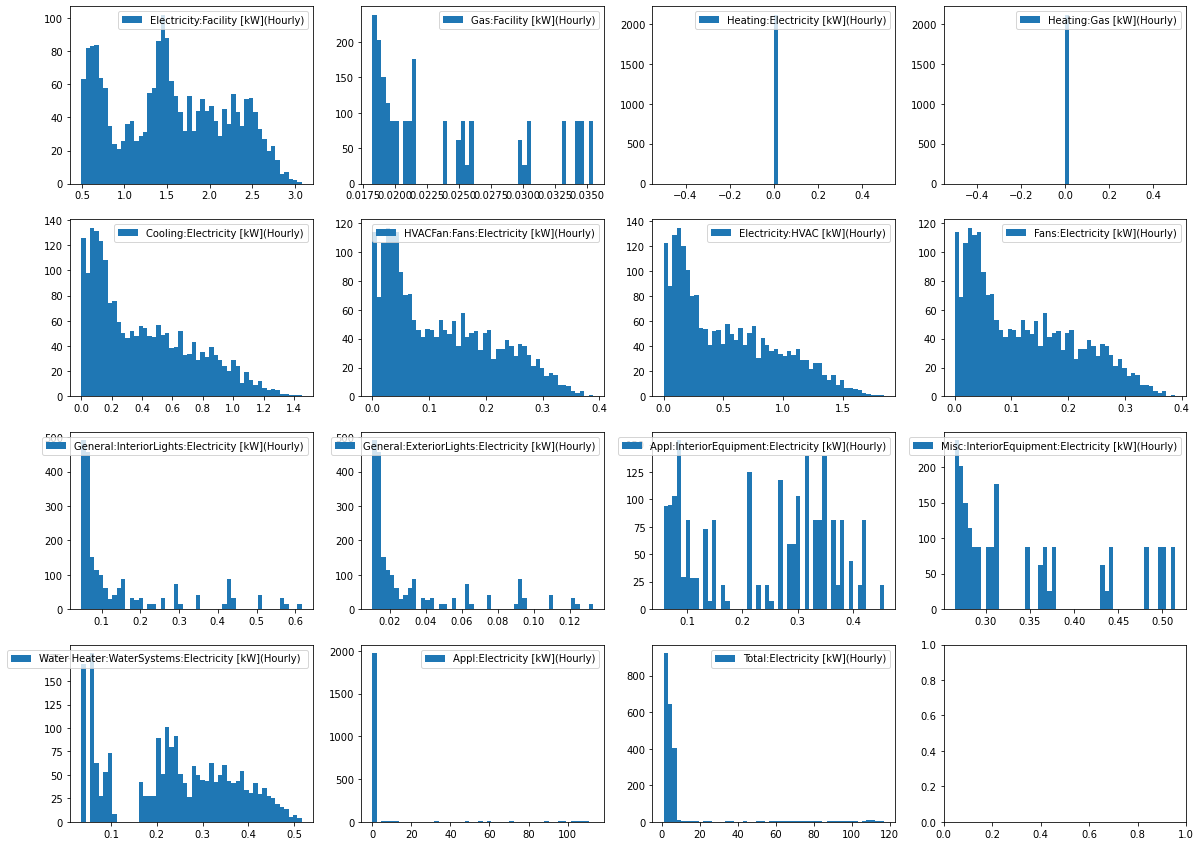

In [9]:
fig, ax = plt.subplots(4, 4, figsize=(20, 15))

for i in range(15):
    ax[i//4, i%4].hist(df.iloc[:, i], bins=50, label=df.columns[i])
    ax[i//4, i%4].legend()

In [10]:
(df['Heating:Electricity [kW](Hourly)'] == 0).all()

True

In [11]:
(df['Heating:Gas [kW](Hourly)'] == 0).all()

True

In [ ]:
df['hour'] = df.index.hour
df['weekday'] = df.index.weekday
df['month'] = df.index.month

In [16]:
abnormal_total = (df >> 
filter_by(X.__getattr__('Appl:Electricity [kW](Hourly)') > 
X.__getattr__('Appl:Electricity [kW](Hourly)').mean() 
+ 3*X.__getattr__('Appl:Electricity [kW](Hourly)').std()) )

print('Ratio of abnormal points: {}%'.format(round(abnormal_total.shape[0]/df.shape[0]*100, 3)))

Ratio of abnormal points: 3.835%


In [17]:
(abnormal_total >> 
select(X.hour, X.__getattr__('Appl:Electricity [kW](Hourly)'))
>> group_by(X.hour)
>> summarize( count = n(X.hour), 
average = X.__getattr__('Appl:Electricity [kW](Hourly)').mean()))

,hour,count,average
0,3,1,62.648131
1,9,1,65.196194
2,10,4,71.618112
3,11,26,94.883812
4,12,41,97.439401
5,13,6,88.731392
6,14,1,61.688930
7,15,1,88.569100


In [18]:
(abnormal_total >> 
select(X.weekday, X.__getattr__('Appl:Electricity [kW](Hourly)'))
>> group_by(X.weekday)
>> summarize( count = n(X.weekday)))

,weekday,count
0,0,14
1,1,9
2,2,6
3,3,15
4,4,9
5,5,11
6,6,17


# Hourly/Weekday/Month Patterns

<AxesSubplot:xlabel='time'>

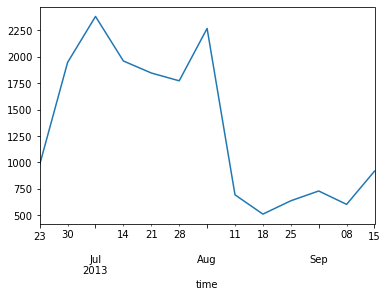

In [19]:
df_week = df.resample('W').sum()

df_week['Total:Electricity [kW](Hourly)'].plot()

Text(0, 0.5, 'kW (Hourly)')

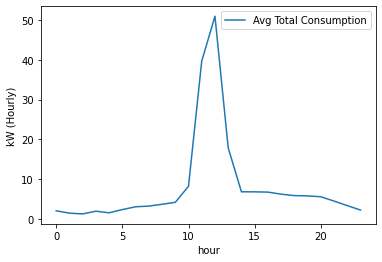

In [20]:
# pattern by hour
ax = (df >>
select(X.hour, 'Total:Electricity [kW](Hourly)') >>
group_by(X.hour) >>
summarise_each([np.mean, np.std], 'Total:Electricity [kW](Hourly)') ).plot(x = "hour",
                                   y = "Total:Electricity [kW](Hourly)_mean",
                                   label = 'Avg Total Consumption',
                                   kind = "line")
plt.ylabel('kW (Hourly)')

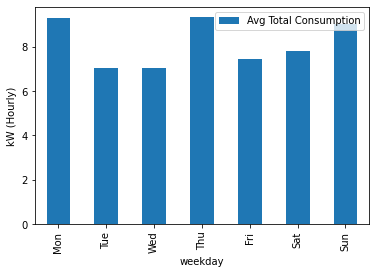

In [21]:
# pattern by weekday
ax = (df >>
select(X.weekday, 'Total:Electricity [kW](Hourly)') >>
group_by(X.weekday) >>
summarise_each([np.mean, np.std], 'Total:Electricity [kW](Hourly)') ).plot(x = "weekday",
                                   y = "Total:Electricity [kW](Hourly)_mean",
                                   label = 'Avg Total Consumption',
                                   kind = "bar")
plt.ylabel('kW (Hourly)')
ax.set_xticks(range(7))
ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']);

Text(0, 0.5, 'kW (Hourly)')

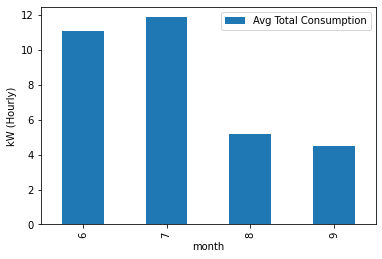

In [22]:
# pattern by month
(df >>
select(X.month, 'Total:Electricity [kW](Hourly)') >>
group_by(X.month) >>
summarise_each([np.mean, np.std], 'Total:Electricity [kW](Hourly)') ).plot(x = "month",
                                   y = "Total:Electricity [kW](Hourly)_mean", 
                                   label = 'Avg Total Consumption',
                                   kind = "bar")
plt.ylabel('kW (Hourly)')